<a href="https://colab.research.google.com/github/peeyushsinghal/EVA/blob/main/Assignment2-5/assignment_2_5_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries

In [1]:
import torch
from torch.utils.data import Dataset # extending Dataset class for custom dataset
from torchvision import datasets # downloading MNIST
from torchvision.utils import make_grid # for vizualizing dataset loader
import torchvision.transforms  # to convert to tensor, normalization etc
import matplotlib.pyplot as plt # to plot pictures and check
import random # to generate random numbers
import torch.optim as optim # optimizer
import torch.nn as nn # to create network
import torch.nn.functional as F # to use in network to not include params
import numpy as np # for image plotting funtions

In [2]:
use_cuda = torch.cuda.is_available() # checking GPU
device = torch.device("cuda" if use_cuda else "cpu") # selecting GPU or CPU as per availability

###Dataset and Dataloader

- The dataset is based on MNIST: a new dataset class inherited from MNIST is created which not only includes the MNIST image but also a random number between 0 to 9. Further the dataset includes not only the MNIST label but also the sum of the label and the random number (integer).

- Dataloaders - both test and train is created based on the new dataset class created 

In [3]:
class MNISTCombined(datasets.MNIST):
  '''
  The dataset object MNISTCombined extends MNIST
  It would return MNIST Image, random number, MNIST Label and Sum of MNIST Label and Random Number as output
  '''
  # def __init__(self):
  #  no change from super, it is ok not to write this here also

  def __getitem__(self,index):
    image,label  = super(MNISTCombined,self).__getitem__(index) # this gets super class' get item 
    random_number = torch.tensor(random.randint(0,9)) # random number between 0 and 9
    return (image, random_number,label, label+ random_number) # outputs image, random number, label, sum of label and random number
  
  # def __len__(self):
  # no change from super, it is ok not to write this here also

In [4]:
# creating training and test loaders

batch_size_train = 32
batch_size_test = 1000 # this can be high as we just need the forward pass here

train_loader = torch.utils.data.DataLoader(
    MNISTCombined(
        root ='./', #arbit directory
        train=True, #train
        download=True,
        transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),#changing to tensor
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))#normalizing
                                   ])),
                                   batch_size=batch_size_train, 
                                   shuffle=True# shuffling the dataset
                                   )

test_loader = torch.utils.data.DataLoader(
    MNISTCombined(
        root ='./', #arbit directory
        train=True, #train
        download=True,
        transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),#changing to tensor
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))#normalizing
                                   ])),
                                   batch_size=batch_size_test, 
                                   shuffle=True# shuffling the dataset
                                   )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/train-images-idx3-ubyte.gz to ./MNISTCombined/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/train-labels-idx1-ubyte.gz to ./MNISTCombined/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/t10k-images-idx3-ubyte.gz to ./MNISTCombined/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNISTCombined/raw/t10k-labels-idx1-ubyte.gz to ./MNISTCombined/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label:  tensor([1, 6, 9, 8, 1, 7, 7, 9, 8, 7, 7, 2, 9, 7, 3, 8, 5, 1, 9, 7, 7, 2, 1, 9,
        1, 2, 9, 7, 1, 1, 1, 2]), 
random number: tensor([0, 4, 6, 5, 5, 8, 2, 1, 6, 0, 7, 9, 0, 1, 7, 6, 9, 3, 5, 8, 2, 4, 2, 3,
        8, 8, 2, 7, 0, 1, 8, 9]), 
sum of label and random number: tensor([ 1, 10, 15, 13,  6, 15,  9, 10, 14,  7, 14, 11,  9,  8, 10, 14, 14,  4,
        14, 15,  9,  6,  3, 12,  9, 10, 11, 14,  1,  2,  9, 11])


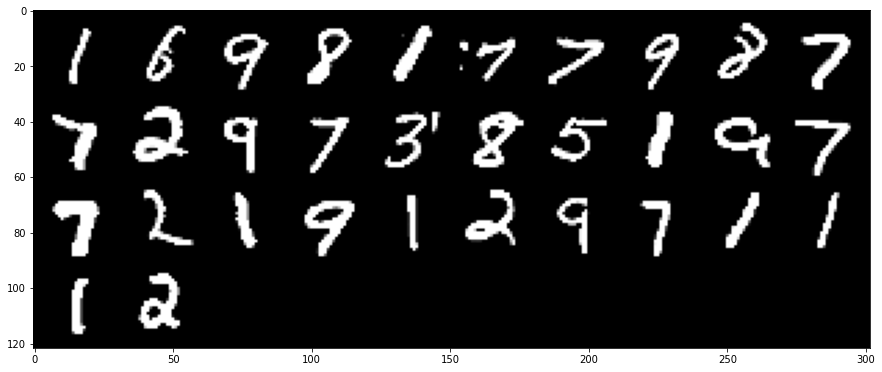

In [5]:
# visualizing the data set batch
img, number, label, sum_label_number = next(iter(train_loader))
grid = make_grid(img, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print (f'label:  {label}, \nrandom number: {number}, \nsum of label and random number: {sum_label_number}')

In [6]:
img, number, label, sum_label_number = next(iter(train_loader))
print(img.shape,number.shape,label.shape,sum_label_number.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32]) torch.Size([32]) torch.Size([32])


In [7]:
number_one_hot = F.one_hot(number, num_classes=10) # checking how would one hot encoding would look like, actual encoding is done in NN forward function
print (f'number_one_hot\n{number_one_hot}')

number_one_hot
tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1

### Network

- It uses CNN to understand the image representation
- The image representation and one hot encoding of random number is concatenated
- Two separate heads are used - one for label prediction (classes 10) and one for sum prediction (classes 19), both taking the conctenated tensor

In [8]:
class Network(nn.Module):
  def __init__(self):
    super(Network,self).__init__()
    
    # self.conv1= nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5) # Input- 1x28x28 Output-6x24x24, 
    # self.conv2= nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5) # Input- 6x24x24 Output-12x20x20

    self.conv1= nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3) 
    self.conv2= nn.Conv2d(in_channels=3,out_channels=6,kernel_size=3) 
    self.conv3= nn.Conv2d(in_channels=6,out_channels=12,kernel_size=3) 
    self.conv4= nn.Conv2d(in_channels=12,out_channels=24,kernel_size=3)

    # A dense network head for label understanding
    self.label_fc1 = nn.Linear(in_features=((24*4*4)+10), out_features=120) # input features to include flattened image and random number on hot encoding
    self.label_fc2 = nn.Linear(in_features=120, out_features=60) 
    self.label_out = nn.Linear(in_features=60, out_features=10) # output would include one hot encoding for image label

    # A dense network head for sum of image label and random number understanding
    self.sum_fc1 = nn.Linear(in_features=((24*4*4)+10), out_features=120) # input features to include flattened image and random number on hot encoding
    self.sum_fc2 = nn.Linear(in_features=120, out_features=60) 
    self.sum_out = nn.Linear(in_features=60, out_features=19) # output would include one hot encoding for sum of image label and random number

  def forward(self,img,random_number):
    # The network takes in two inputs - image and random number
    x = img
    one_hot_random_number= F.one_hot(random_number.long(),num_classes=10) # TODO : .long is used as per stackoverflow, read about this

    # conv1 layer
    x = F.relu(self.conv1(x)) # Input- 1x28x28 Output-3x26x26

    # conv2 layer
    x = F.relu(self.conv2(x)) # Input- 3x26x26 Output-6x24x24
    x = F.max_pool2d(x,kernel_size=2, stride= 2) # Input- 6x24x24 Output-6x12x12

    # conv3 layer
    x = F.relu(self.conv3(x)) # Input- 6x12x12 Output-12x10x10

    # conv4 layer
    x = F.relu(self.conv4(x)) # Input- 12x10x10 Output-24x8x8
    x = F.max_pool2d(x,kernel_size=2, stride= 2) # Input- 24x8x8 Output-24x4x4

    # reshape
    x = x.reshape(-1, 24 * 4 * 4) # representation of image, flattened

    # concatenating image representation and one hot random number
    x_combined = torch.cat((x,one_hot_random_number),dim=1)

    # label fc1 layer
    img_label = F.relu(self.label_fc1(x_combined))
    # label fc2 layer
    img_label = F.relu(self.label_fc2(img_label))
    # label fc out layer
    img_label = self.label_out(img_label)

    # sum fc1 layer
    sum_label_number = F.relu(self.sum_fc1(x_combined))
    # sum fc2 layer
    sum_label_number = F.relu(self.sum_fc2(sum_label_number))
    # sum fc out layer
    sum_label_number = self.sum_out(sum_label_number)

    pred_label_one_hot = F.log_softmax(img_label, dim=1)
    pred_sum_label_number_one_hot = F.log_softmax(sum_label_number, dim=1)

    return pred_label_one_hot,pred_sum_label_number_one_hot

model = Network()
print(model)

Network(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (label_fc1): Linear(in_features=394, out_features=120, bias=True)
  (label_fc2): Linear(in_features=120, out_features=60, bias=True)
  (label_out): Linear(in_features=60, out_features=10, bias=True)
  (sum_fc1): Linear(in_features=394, out_features=120, bias=True)
  (sum_fc2): Linear(in_features=120, out_features=60, bias=True)
  (sum_out): Linear(in_features=60, out_features=19, bias=True)
)


## Training and Testing

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = F.nll_loss #F.cross_entropy # global

In [10]:
def train(model, device, train_loader, optimizer, epoch):
  '''
  Train function takes in model, train_loader (data), optimizer and epoch and then trains the model
  This is a single epoch train function, it is expected that it would be inside a loop
    model - network
    device - GPU or CPU
    train_loader - custom train loader
    optimizer - optimizer object
    epoch - epoch number, in a loop typically executed
  '''
  model.train() # training mode on, enables gradient


  for batch_idx,(images, numbers, labels, sums_label_number) in enumerate(train_loader):
    optimizer.zero_grad() # setting gradients to zero, to remove accumulated gradients
    images, numbers, labels, sums_label_number = images.to(device), numbers.to(device), labels.to(device), sums_label_number.to(device) # sending tensors to GPU

    pred_labels, pred_sums_label_numbers= model(images,numbers) # Pass Batch, model takes two inputs and provides two outputs

    loss_label = loss_func(pred_labels,labels) # image label related loss calculation
    loss_sum = loss_func(pred_sums_label_numbers,sums_label_number) # sum of image label and random number loss calculation
    loss = 0.5*(loss_label + loss_sum) # overall loss 

    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    # print for some batches
    if (batch_idx % 100 == 0):
      print (f'Inside Training epoch - {epoch}, processing step {(batch_idx+1)*len(images[0])} , Training loss: {loss.item()}')

  # print for each epoch
  print(
    "After completion of epoch", epoch, 
    "  Training loss:", loss.item()
    )

In [11]:
def test(model, device, test_loader):
  '''
  Test function takes in model, test_loader (data), and evaluates the model
    model - network
    device - GPU or CPU
    test_loader - custom test data loader
  '''

  model.eval() # evaluation mode on, no updates to params
  total_loss = 0
  total_correct_label = 0
  total_correct_sum = 0
  with torch.no_grad():
    for (images, numbers, labels, sums_label_number) in (test_loader):
      images, numbers, labels, sums_label_number = images.to(device), numbers.to(device), labels.to(device), sums_label_number.to(device) # sending tensors to GPU
      pred_labels, pred_sums_label_numbers= model(images,numbers) # Pass Batch, model takes two inputs and provides two outputs in one hot encoding

      # predictions are in one hot encoding and ground truth are not
      loss_label = loss_func(pred_labels,labels) # image label related loss calculation
      loss_sum = loss_func(pred_sums_label_numbers,sums_label_number) # sum of image label and random number loss calculation
      loss= 0.5*(loss_label + loss_sum) # overall loss 

      total_loss += loss.item() # aggregating loss

      # converting predictions to numbers from one hot encoding and checking the correct label

      total_correct_label +=  pred_labels.argmax(dim=1).eq(labels).sum().item() # checking correct label 
      total_correct_sum += pred_sums_label_numbers.argmax(dim=1).eq(sums_label_number).sum().item() # checking correct sum 

  # print for each epoch
  print(
    "Testing...\n"
    "Test loss:", total_loss,
    "total_correct_label:", total_correct_label, 
    "accuracy_labels:", round(100.*total_correct_label/len(train_loader.dataset),3), "% ",
    "total_correct_sum:",total_correct_sum,
    "accuracy_correct_sum:",  round(100.*total_correct_sum/len(train_loader.dataset),3),"% "
    )

In [12]:
n_epochs = 5
model = model.to(device)

for epoch in range(1, n_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model,device,test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Inside Training epoch - 1, processing step 1 , Training loss: 2.624965190887451
Inside Training epoch - 1, processing step 101 , Training loss: 1.5524474382400513
Inside Training epoch - 1, processing step 201 , Training loss: 1.3173660039901733
Inside Training epoch - 1, processing step 301 , Training loss: 1.3680286407470703
Inside Training epoch - 1, processing step 401 , Training loss: 1.3590097427368164
Inside Training epoch - 1, processing step 501 , Training loss: 1.3105884790420532
Inside Training epoch - 1, processing step 601 , Training loss: 1.1552027463912964
Inside Training epoch - 1, processing step 701 , Training loss: 1.0195976495742798
Inside Training epoch - 1, processing step 801 , Training loss: 0.8428730368614197
Inside Training epoch - 1, processing step 901 , Training loss: 1.017943024635315
Inside Training epoch - 1, processing step 1001 , Training loss: 0.7416382431983948
Inside Training epoch - 1, processing step 1101 , Training loss: 0.8804164528846741
Inside

### Sample Prediction

In [13]:
def sample_results(model, device, test_loader, num_samples = 1):
  for i in range(num_samples):
    images, numbers, labels, sums_label_number = next(iter(test_loader))
    images, numbers, labels, sums_label_number = images.to(device), numbers.to(device), labels.to(device), sums_label_number.to(device) # sending tensors to GPU
    output, output_sum = model(images[i].unsqueeze(dim=0), numbers[i].unsqueeze(dim=0))
    print(f"Image Predicted:{torch.argmax(output.squeeze()).item()}, Image Actual:{labels[i].item()},Random Input Number:{numbers[i].item()},Sum Precicted:{torch.argmax(output_sum.squeeze()).item()}, Sum Actual:{sums_label_number[i]}")

In [14]:
sample_results(model, device, test_loader, num_samples = 1)

Image Predicted:4, Image Actual:4,Random Input Number:1,Sum Precicted:5, Sum Actual:5
